# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [4]:
#Your code here
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [5]:
#Your code here
df = df.set_index('linename')

## Change the index back

In [6]:
# Your code here
df = df.reset_index()

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [7]:
# Your code here
df['Num_Lines'] = df.linename.apply(lambda x: len(x))

## Write a function to clean a column name

In [8]:
def clean(col_name):
    cleaned = col_name.lower()
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [9]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
# Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

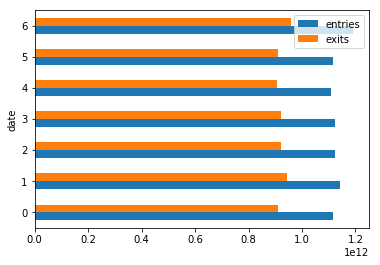

In [11]:
# Your code here
days = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df.date = pd.to_datetime(df.date,  format='%m/%d/%Y')
grouped = df[['entries','exits']].groupby(df.date.dt.weekday).sum()
day_of_week_plot = grouped.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [ ]:
#Your code here
import sys
#19615760
def weekend_weekday(dframe, x, col):
    if dframe.loc[x][col].weekday() in (1,2,3,4,5):
        return 'Weekday'
    if dframe.loc[x][col].weekday() in (0,6):
        return 'Weekend'
grouped = df[['entries','exits']].groupby(lambda x: weekend_weekday(df, x, 'date')).sum()
weekend_weekday_plot = grouped.plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
#Not normalized by 5 days in the week and 2 days on the weekend, 
#also friday night should count as the weekend and sunday night should count as the week

## Drop a couple of columns

In [14]:
# Your code here
#df = df.drop(columns=['c/a','unit','scp','division','desc'])
df

,linename,station,date,time,entries,exits,Num_Lines,weekend_weekday
0,NQR456W,59 ST,2018-08-25,00:00:00,6736067,2283184,7,Weekday
1,NQR456W,59 ST,2018-08-25,04:00:00,6736087,2283188,7,Weekday
2,NQR456W,59 ST,2018-08-25,08:00:00,6736105,2283229,7,Weekday
3,NQR456W,59 ST,2018-08-25,12:00:00,6736180,2283314,7,Weekday
4,NQR456W,59 ST,2018-08-25,16:00:00,6736349,2283384,7,Weekday
5,NQR456W,59 ST,2018-08-25,20:00:00,6736562,2283425,7,Weekday
6,NQR456W,59 ST,2018-08-26,00:00:00,6736683,2283460,7,Weekend
7,NQR456W,59 ST,2018-08-26,04:00:00,6736696,2283461,7,Weekend
8,NQR456W,59 ST,2018-08-26,08:00:00,6736705,2283483,7,Weekend
9,NQR456W,59 ST,2018-08-26,12:00:00,6736746,2283524,7,Weekend


## Summary

Great! You practiced your data cleanup-skills using Pandas.